In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output, display, Math, Latex
from atlas_ml import *

In [2]:
df = pd.read_csv('Datasets/Regression/ex2data1.csv')
A2 = df.values.T
X2 = A2[0:2,0:-10]
Y2 = A2[2:3,0:-10]
Y2 = one_hot(Y2,2)
X2_test = A2[0:2,0:-10]
Y2_test = A2[2:3,0:-10]
Y2_test = one_hot(Y2_test,2)

Simple Sample to Test whether Linear Regression Works. Linear model: W*X + b

In [3]:
X = np.array(range(-100,100,1))/10
Y = 3*(X)+4
X = np.expand_dims(X,1).T
Y = np.expand_dims(Y,1).T
X_test = np.array(range(100,120,1))/10
Y_test = 3*(X_test)+4
X_test = np.expand_dims(X_test,1).T
Y_test = np.expand_dims(Y_test,1).T

Declaring Linear 'Regressor' using abstracted concepts in atlas_ml.py

In [4]:
class Linear:
    def __init__(self, X_size, Y_size, lossfn):
        self.regressor = layer(X_size, Y_size, no_op)
        self.lossfn = lossfn
        
    def f_pass(self, X):
        self.H = self.regressor.forward(X)
        return self.H
    
    def back_prop(self,X,Y, batch_size):
        m = batch_size
        self.loss = self.lossfn.get_loss(self.H,Y)
        dZ = self.lossfn.diff(self.H,Y)
        self.regressor.out_grad(dZ, X, m)
        
    def optim(self, lr, beta=0):
        self.regressor.step(lr,beta)

In [5]:
class Logistic:
    def __init__(self, X_size, Y_size, lossfn):
        self.regressor = layer(X_size, Y_size, softmax)
        self.lossfn = lossfn
        
    def f_pass(self, X):
        self.H = self.regressor.forward(X)
        return self.H
    
    def back_prop(self, X, Y, batch_size):
        m = batch_size
        self.loss = self.lossfn.get_loss(self.H,Y)
        dZ = self.lossfn.diff(self.H,Y)
        self.regressor.out_grad(dZ, X, m)
    
    def optim(self, lr, beta=0):
        self.regressor.step(lr,beta)

In [6]:
#Model creation
n_in = np.shape(X)[0]
n_out = np.shape(Y)[0]
lin_reg = Linear(n_in,n_out, MSE)

In [30]:
n_in = np.shape(X2)[0]
n_out = np.shape(Y2)[0]
log_reg = Logistic(n_in,n_out,CE_loss)

In [29]:
n_epochs = 20
lr = 0.1
lr_decay = 1
batch_size = 90
beta = 0

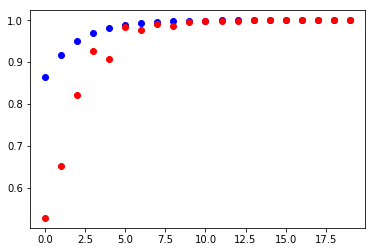

In [9]:
train(lin_reg, X, Y, X_test, Y_test, RMSE, n_epochs)

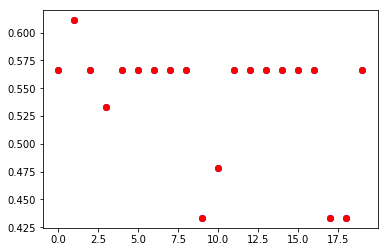

In [31]:
train(log_reg, X2, Y2, X2_test, Y2_test, model_accuracy, n_epochs)

In [28]:
log_reg.loss

44.079471194611074

In [15]:
Y2.shape

(2, 90)